In [67]:
import pandas as pd
from urllib.request import urlretrieve
!pip install kagglehub
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [384]:
boston_df = pd.read_csv('housing.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [386]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [388]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [390]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [396]:
boston_df = boston_df.rename(columns = lambda x: x.lower())

In [398]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


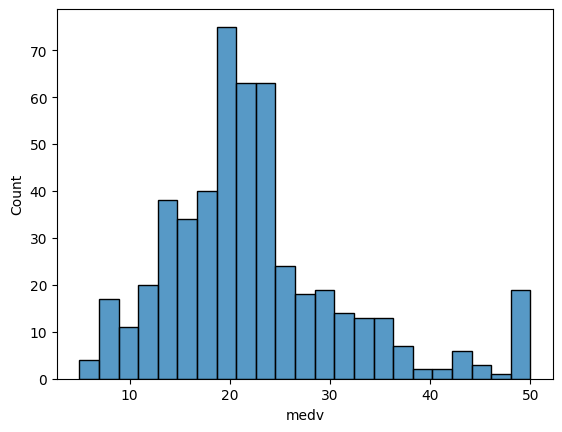

In [400]:
sns.histplot(boston_df['medv'])
plt.show()

In [402]:
matrix = boston_df.corr()
matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


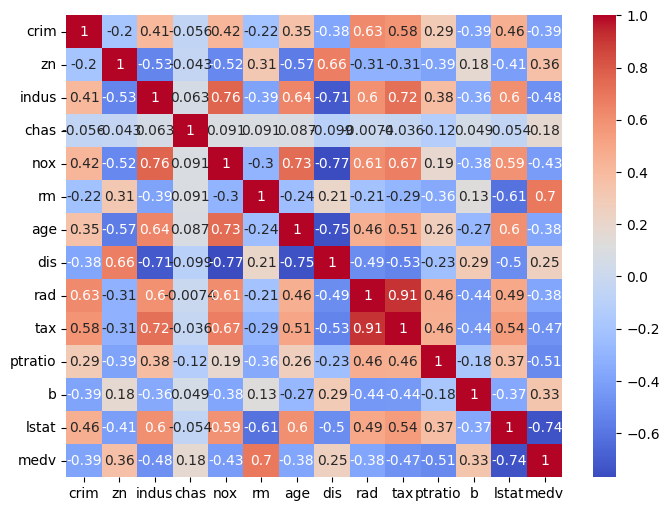

In [404]:
plt.figure(figsize=(8, 6))
sns.heatmap(boston_df.corr(numeric_only = True),annot = True, cmap = 'coolwarm')
plt.show()

In [405]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler



In [408]:
# Load dataset (assuming 'boston_df' is the cleaned dataset)
df = boston_df.copy()

# Define features (excluding 'medv' because it's the dependent variable)
X = df.drop(columns=['medv','rad'])

# Standardize features to improve VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data["VIF"]

0     1.664471
1     2.273018
2     3.682265
3     1.061561
4     4.304929
5     1.885425
6     3.083009
7     3.954951
8     3.415289
9     1.734873
10    1.341459
11    2.937752
Name: VIF, dtype: float64

In [410]:
X = X
y = df['medv']


In [412]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [414]:
# ✅ Manually scale independent variables (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ✅ Scale training data
X_test_scaled = scaler.transform(X_test)  # ✅ Scale test data (using same scaler)


In [417]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [419]:
from sklearn.metrics import r2_score
y_pred_scaled = model.predict(X_test_scaled)
score = r2_score(y_test, y_pred_scaled)  # ✅ Works correctly now
print(f"R² Score: {score:.4f}")


R² Score: 0.6390


In [421]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# ✅ Train Random Forest on scaled data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# ✅ Predict & evaluate performance
y_pred_scaled = rf.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"✅ R² Score on Scaled Data (Manual Scaling): {r2_scaled:.4f}")

✅ R² Score on Scaled Data (Manual Scaling): 0.8936


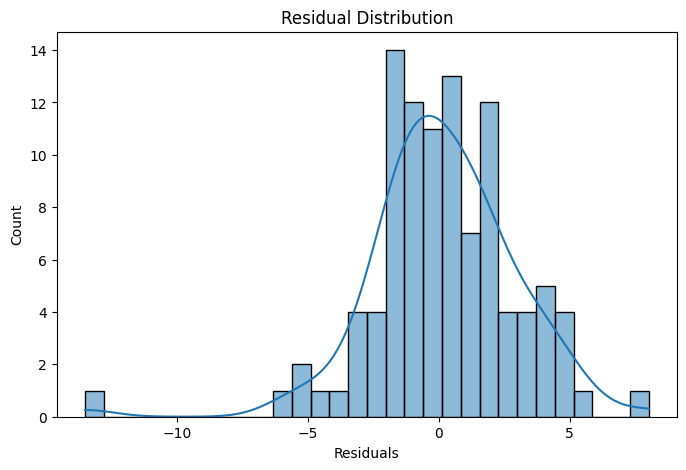

In [364]:
new_residuals = y_test - y_pred_scaled

plt.figure(figsize=(8,5))
sns.histplot(new_residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

In [437]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib


# ✅ Step 4: Split Dataset into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 5: Define Preprocessor for Scaling
preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), X.columns)  # Standardize features
], remainder='passthrough')

# ✅ Step 6: Define Full Pipeline (Scaling + Random Forest)
rf_pipeline_scaled = Pipeline([
    ('preprocessor', preprocessor),  # Scale independent variables
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest model
])

# ✅ Step 7: Train the Pipeline
rf_pipeline_scaled.fit(X_train, y_train)

# ✅ Step 8: Save the Trained Pipeline
pipeline_filename = "rf_pipeline_boston_scaled.pkl"
joblib.dump(rf_pipeline_scaled, pipeline_filename)

# ✅ Step 9: Load the Pipeline (for Real-Time Predictions)
loaded_pipeline_scaled = joblib.load(pipeline_filename)

# ✅ Step 10: Define a New Test Entry (Example House)
new_entry = pd.DataFrame({
    "crim": [0.1],
    "zn": [25.0],
    "indus": [5.0],
    "chas": [0],
    "nox": [0.5],
    "rm": [6.5],
    "age": [30],
    "dis": [5.0],
    "tax": [300],
    "ptratio": [15.0],
    "b": [380.0],
    "lstat": [5.0]
}, columns=X.columns)  # ✅ Ensures correct feature order

# ✅ Step 11: Predict House Price Using the Saved Pipeline
predicted_price_scaled = loaded_pipeline_scaled.predict(new_entry)[0]

print(f"✅ Predicted House Price (with Scaling): ${predicted_price_scaled:.2f}")




✅ Predicted House Price (with Scaling): $24.95


In [483]:
import joblib
import pandas as pd

def predict_house_price(crim, zn, indus, chas, nox, rm, age, dis, tax, ptratio, b, lstat):
    """
    Predict house price using the trained Random Forest pipeline with scaling.
    Returns: Predicted house price in real scale.
    """
    # ✅ Reload the trained pipeline
    pipeline_filename = "rf_pipeline_boston_scaled.pkl"
    loaded_pipeline = joblib.load(pipeline_filename)

    

    # ✅ Create a DataFrame for the new entry
    new_entry = pd.DataFrame({
        "crim": [crim],
        "zn": [zn],
        "indus": [indus],
        "chas": [chas],
        "nox": [nox],
        "rm": [rm],
        "age": [age],
        "dis": [dis],
        "tax": [tax],
        "ptratio": [ptratio],
        "b": [b],
        "lstat": [lstat]
    })

    # ✅ Predict house price using the pipeline
    predicted_price = loaded_pipeline.predict(new_entry)[0]

    return round(predicted_price, 2)

# ✅ Test the One-Call Function
predicted_price = predict_house_price(crim=190, zn=25.0, indus=15.0, chas=100, nox=0.5, rm=1062.5,
                                      age=80, dis=55.0, tax=3, ptratio=5.0, b=380.0, lstat=0.0)

print(f"🏡 ✅ Predicted House Price: ${predicted_price:,.2f}")

🏡 ✅ Predicted House Price: $41.79
